In [1]:
%matplotlib inline
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

lasio will automatically try and import pandas

In [2]:
skru = lasio.read("7220_8_1.las")
wist = lasio.read("7324_8-1_Wisting_4_Michelle.las")

If [pandas](http://pandas.pydata.org/) is installed, you can use the df() method to get a pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) version of the data section:

In [3]:
df_input = skru.df()
df_w_input = wist.df()

In [4]:
list(df_input)

['AI',
 'AI_Fizz',
 'AI_Gas',
 'AI_ORG',
 'AI_Oil',
 'AI_Wet',
 'Aniso39',
 'Aniso39up',
 'BS',
 'CALI',
 'Delta_Backus',
 'Epsilon_Backus',
 'GR',
 'Gamma_Backus',
 'MARKER_FS',
 'NPHI',
 'Output',
 'PHIE',
 'PPORE',
 'PR',
 'PR_ORG',
 'Phi_T',
 'Pr_Fizz',
 'Pr_Gas',
 'Pr_Oil',
 'Pr_Wet',
 'RESD_HC20_Simandoux',
 'RESD_HC80_Simandoux',
 'RESD_Wet_Simandoux',
 'RES_D',
 'RES_M',
 'RES_S',
 'RH39_1DF',
 'RH39_1DF_1',
 'RH39_1DF_2',
 'RH39_1DF_3',
 'RH39up',
 'RH54_1DF',
 'RH54_1DF_1',
 'RH54_1DF_2',
 'RH54_1DF_3',
 'RH54up',
 'RH72_1DF',
 'RH72_1DF_1',
 'RH72_1DF_2',
 'RH72_1DF_3',
 'RH72up',
 'RHOB',
 'RHOB_ORG',
 'RHO_Backus',
 'RV39_1DF',
 'RV39_1DF_1',
 'RV39_1DF_2',
 'RV39_1DF_3',
 'RV39up',
 'RV54_1DF',
 'RV54_1DF_1',
 'RV54_1DF_2',
 'RV54_1DF_3',
 'RV54up',
 'RV72_1DF',
 'RV72_1DF_1',
 'RV72_1DF_2',
 'RV72_1DF_3',
 'RV72up',
 'Rhob_Fizz',
 'Rhob_Gas',
 'Rhob_Oil',
 'Rhob_Wet',
 'SG',
 'SO',
 'SW',
 'TEMP',
 'TVD',
 'VAnhydrite',
 'VCalcite',
 'VClay',
 'VCoal',
 'VDolomite',
 'VF

In [5]:
#For Skrugard
#df = df_input[['PHIE', 'RES_D', 'RHOB', 'RV72_1DF', 'SW', 'VP']].copy()
#df = df[df['SW']>.99999]
#df_input = df_input.dropna()
df = df_input[['PHIE', 'RHOB', 'VP', 'VS', 'GR', 'NPHI', 'VClay', 'VCalcite', 'RES_D', 'RH72_1DF', 'RV72_1DF']].copy()
#df = df_input[['PHIE', 'RHOB', 'VP', 'VS', 'RES_D', 'RH72_1DF', 'RV72_1DF']].copy()
df = df.dropna()
df = df[(df.index<1276) | (df.index>1532)]

In [6]:
df = df[(df.index<1276) | (df.index>1532)]
#df['Aniso_RV72RESD'] = df.RV72_1DF / df.RES_D
#df['Aniso_RV72RH72'] = df.RV72_1DF / df.RH72_1DF
df['log10_RV'] = np.log10(df['RV72_1DF'])
df['log10_RESD'] = np.log10(df['RES_D'])
df['log10_RH'] = np.log10(df['RH72_1DF'])
df['log_RV'] = np.log(df['RV72_1DF'])
df['log_RESD'] = np.log(df['RES_D'])
df['log_RH'] = np.log(df['RH72_1DF'])

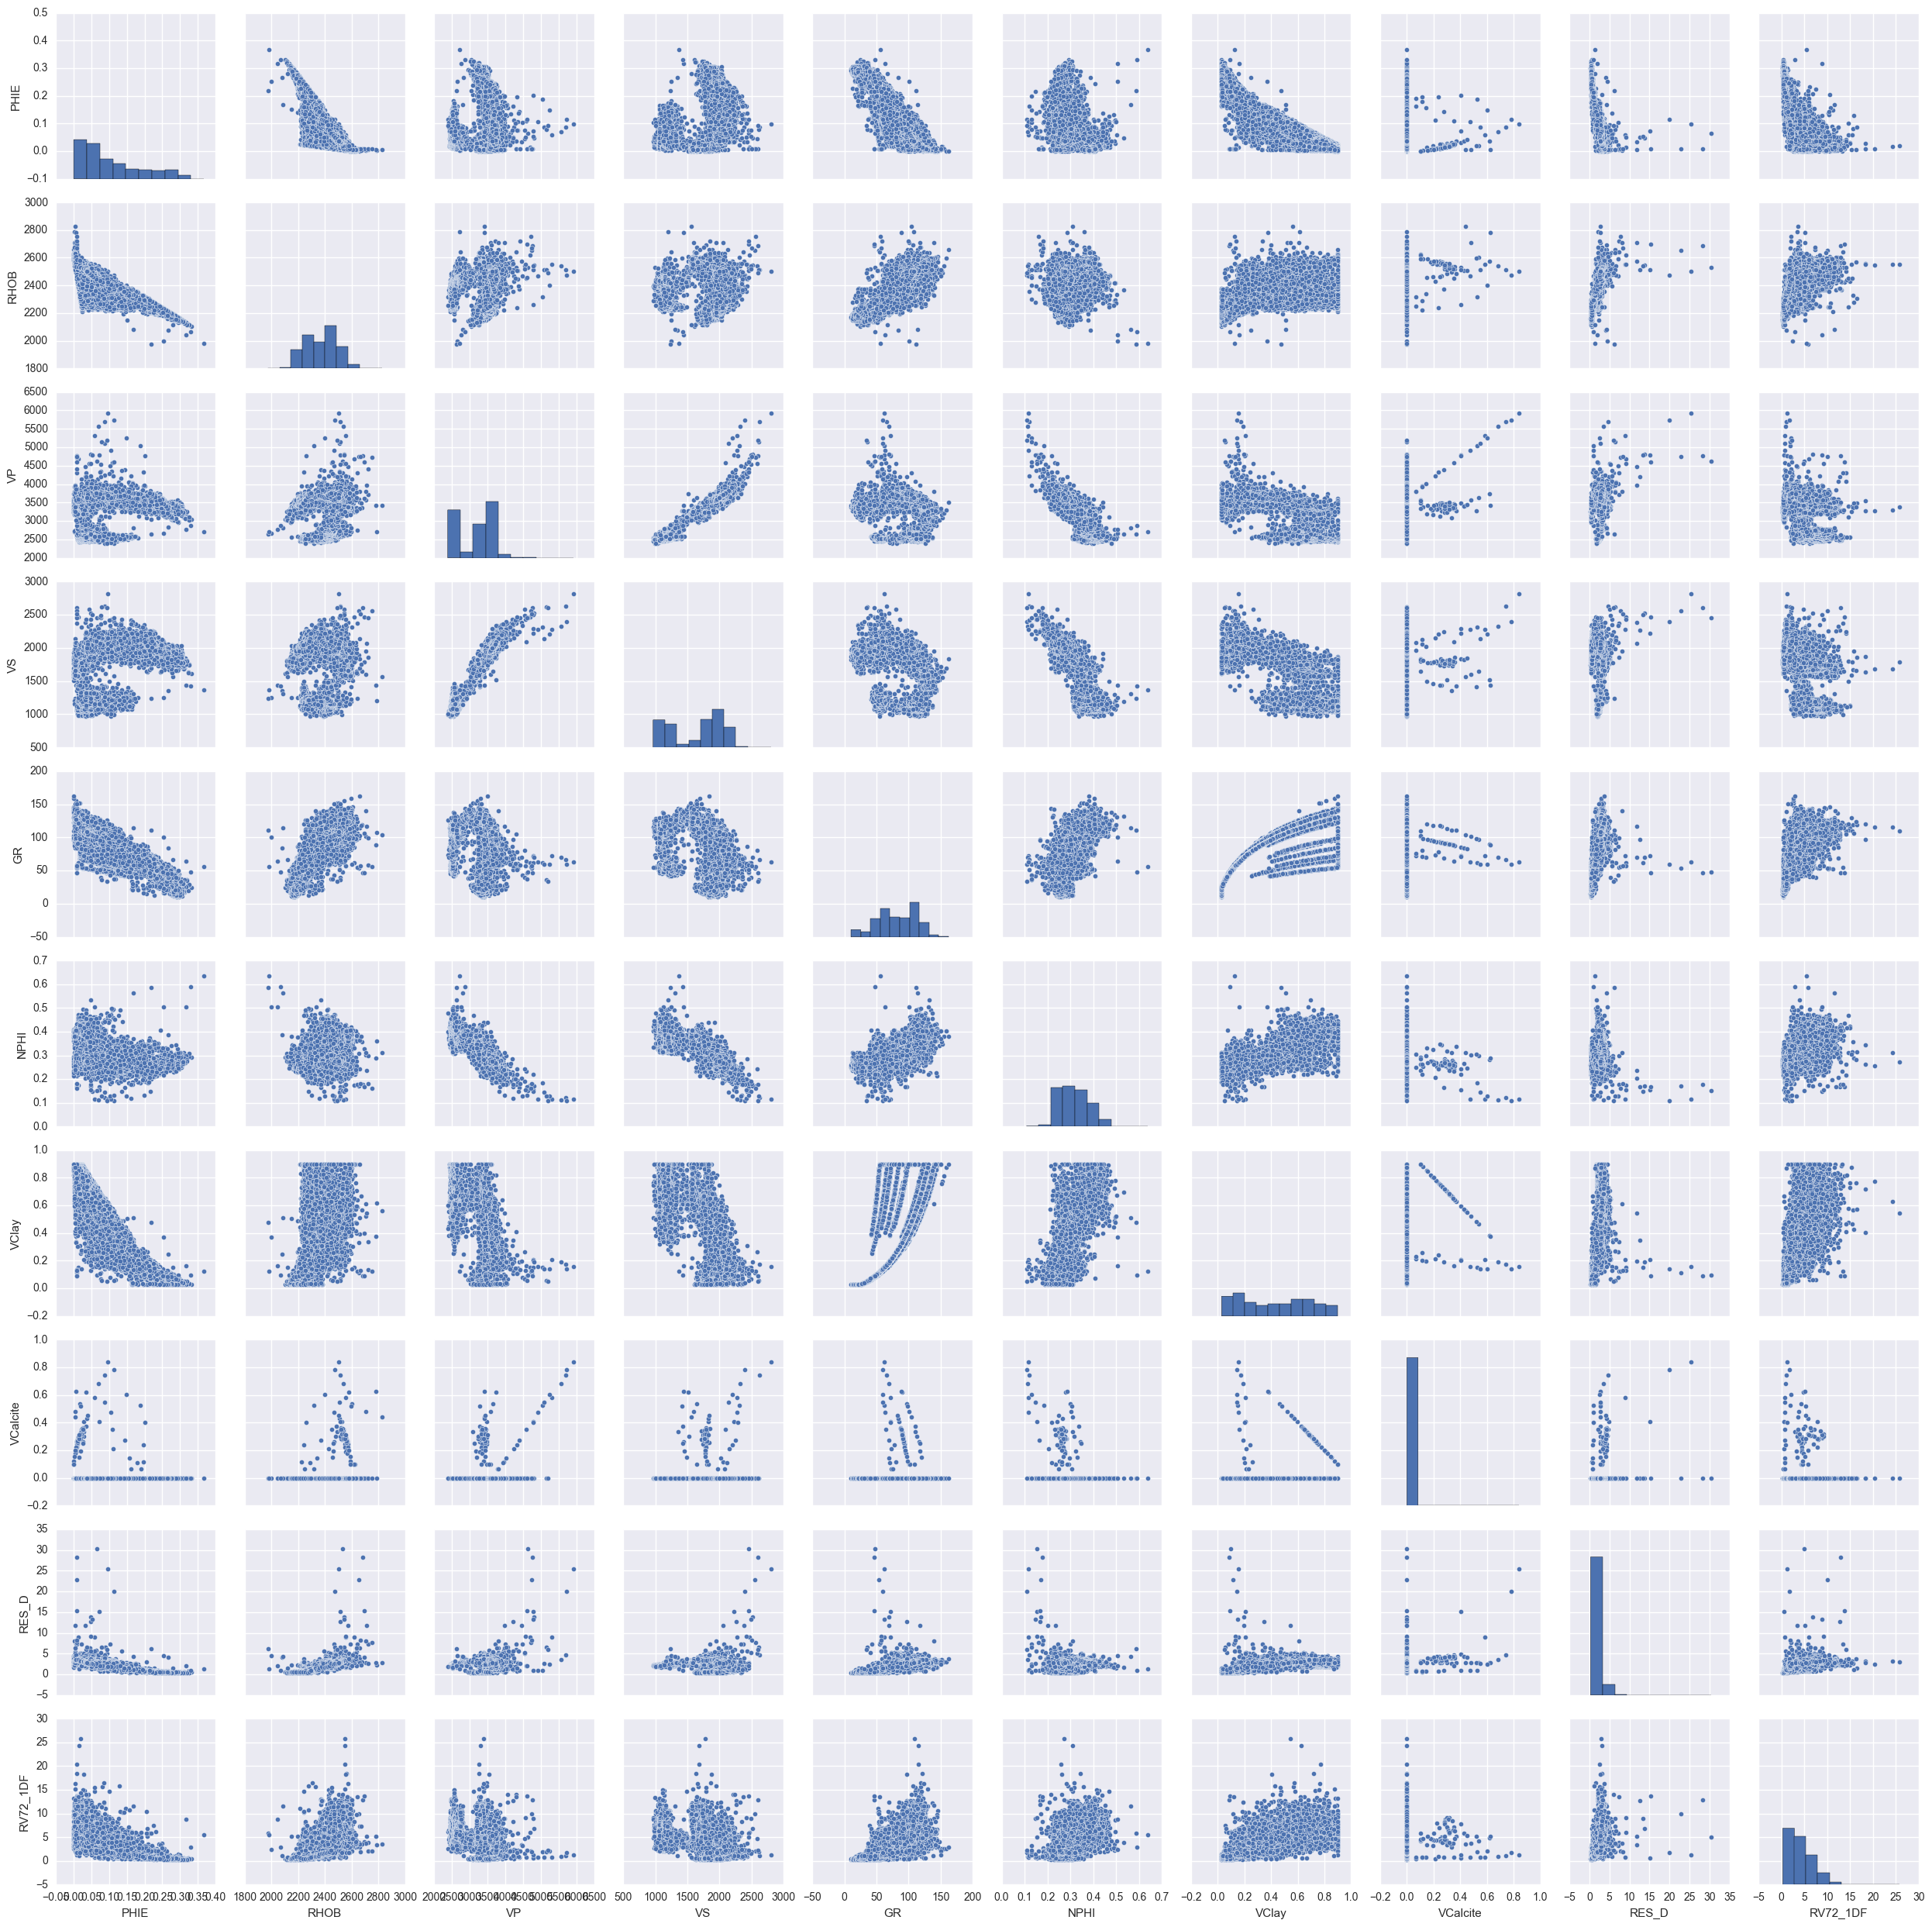

In [7]:
cols=['PHIE', 'RHOB', 'VP', 'VS', 'GR', 'NPHI', 'VClay', 'VCalcite', 'RES_D', 'RV72_1DF']
sns.pairplot(df[cols])

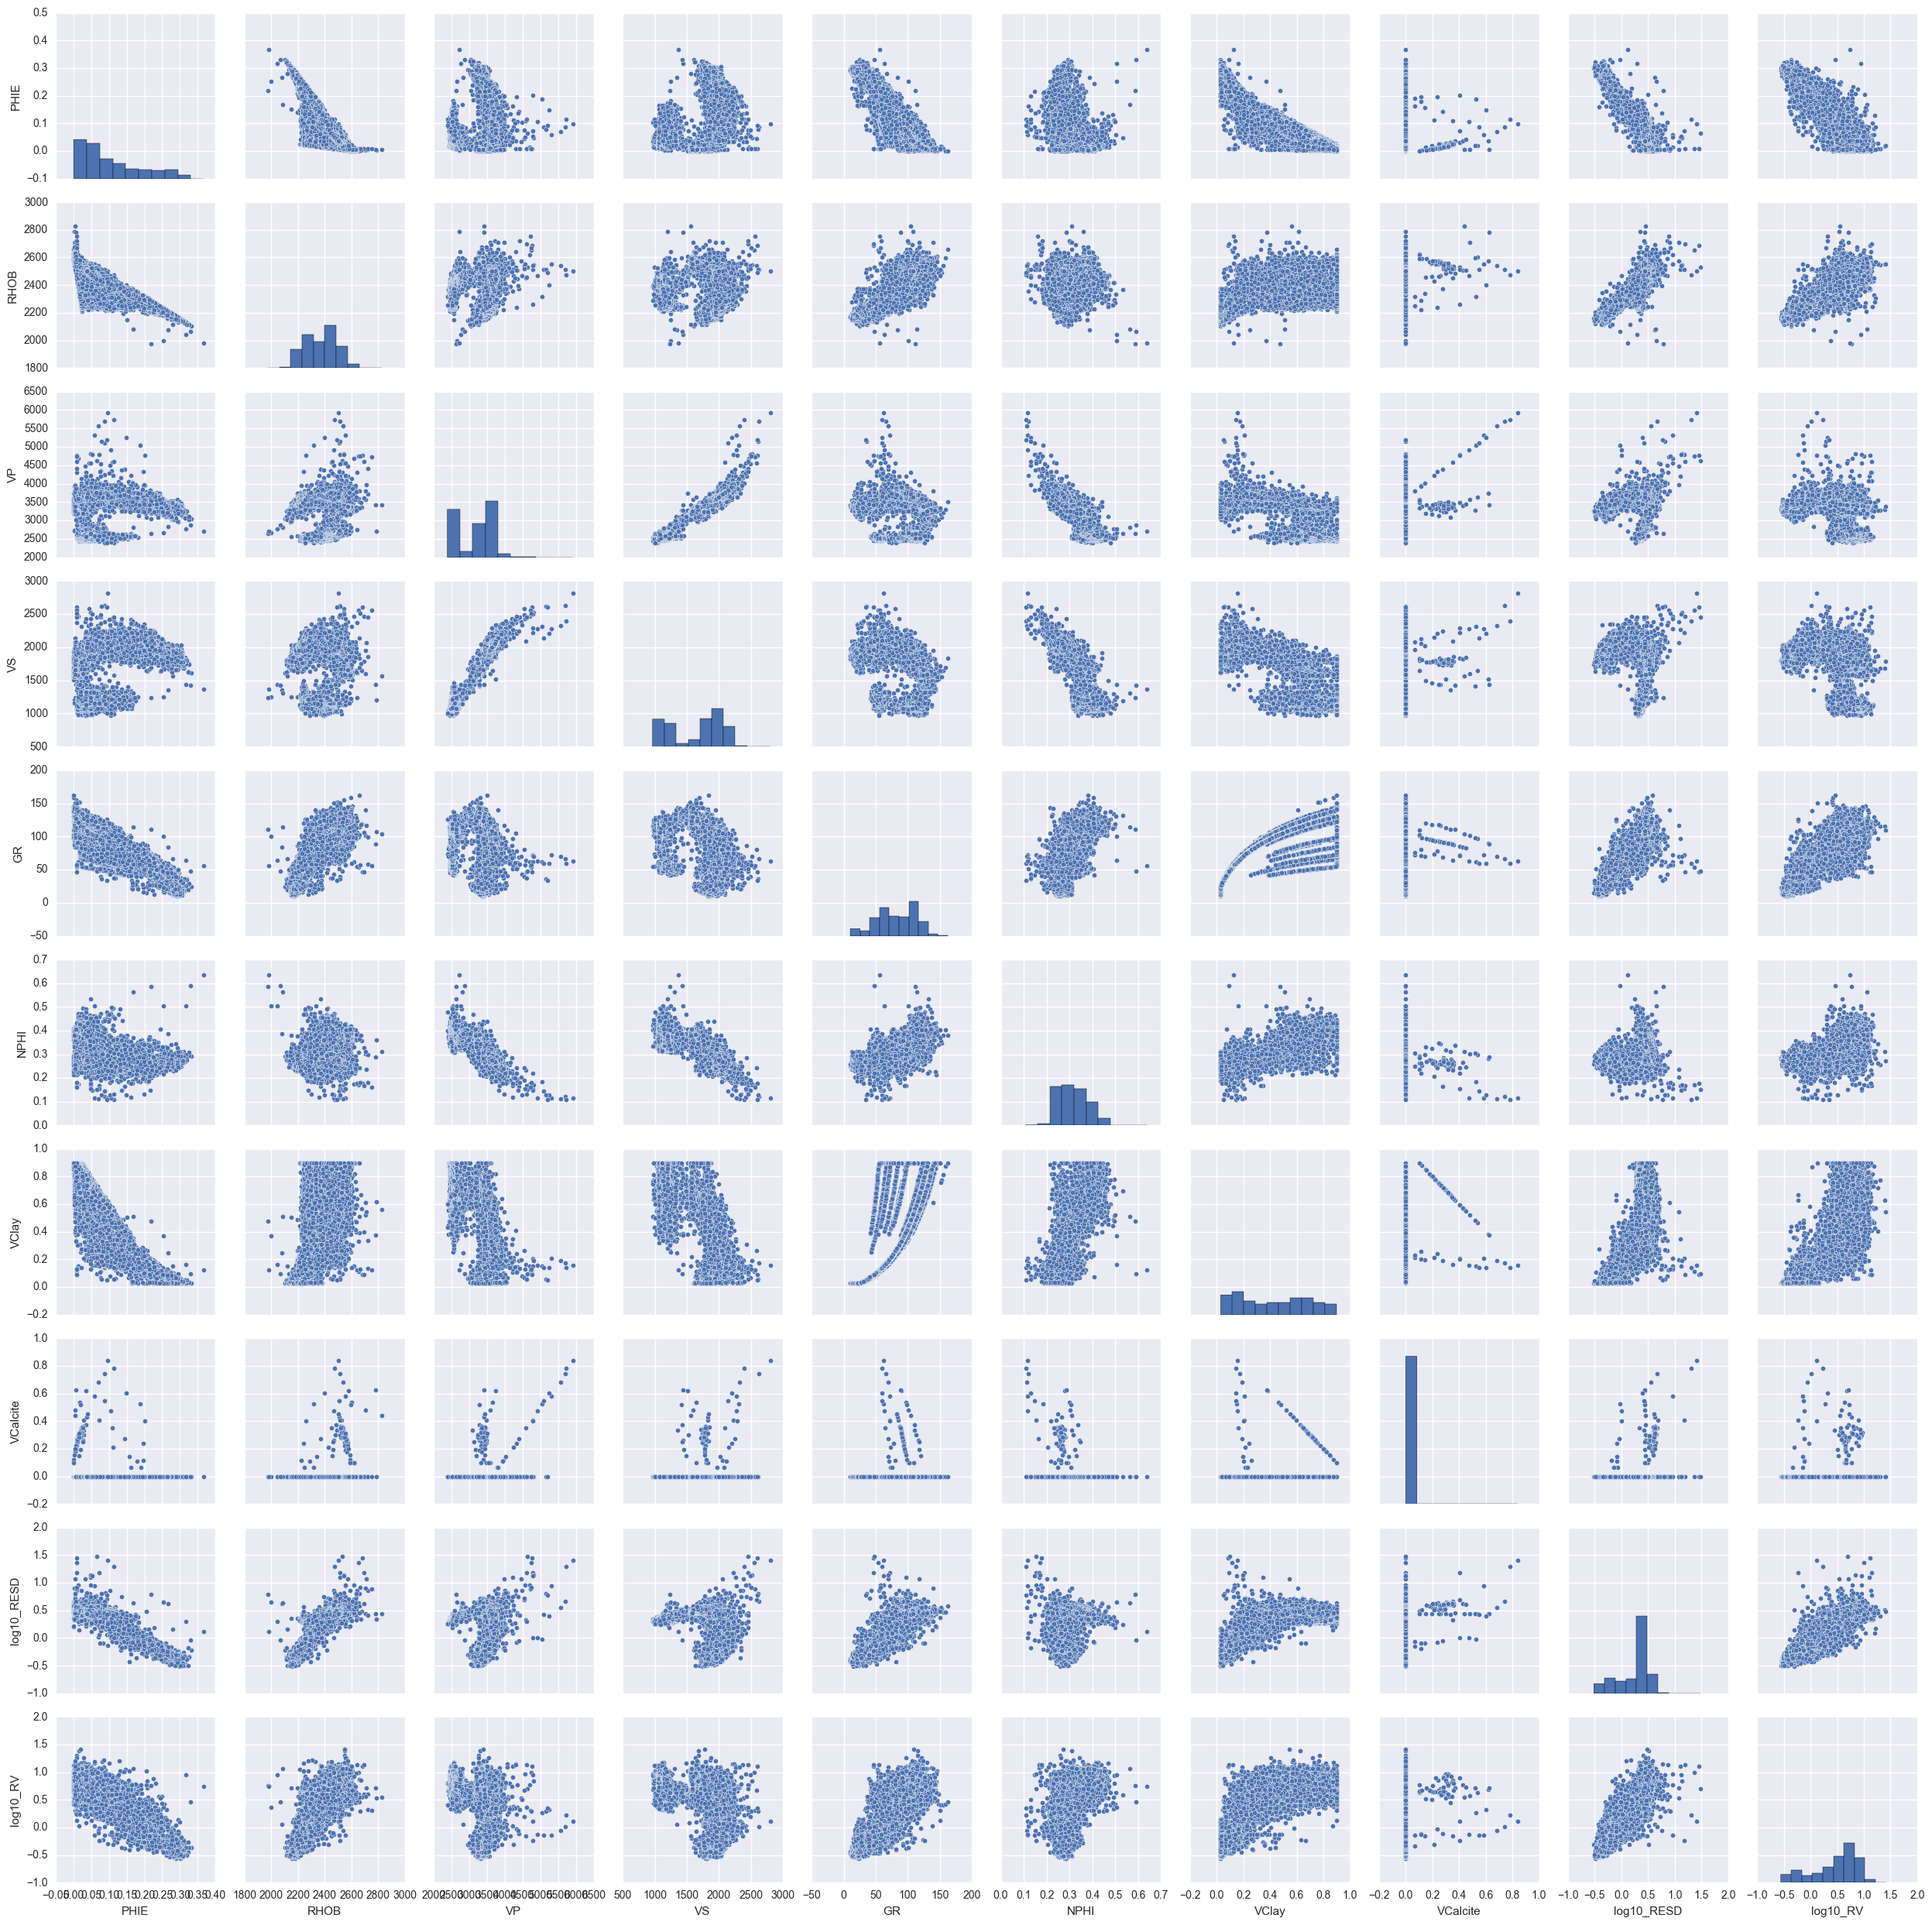

In [8]:
cols_log10res=['PHIE', 'RHOB', 'VP', 'VS', 'GR', 'NPHI', 'VClay', 'VCalcite', 'log10_RESD', 'log10_RV']
sns.pairplot(df[cols_log10res])

In [9]:
# For Wisting
#df = df_input[['PHIE', 'RES_D', 'RHOB', 'RV72_1DF', 'SW', 'VP']].copy()
df_w_input = df_w_input[df_w_input['SW']>.99999]
df_w = df_w_input[['PHIE', 'RHOB', 'VP', 'GR', 'NPHI', 'VS', 'VCLAY', 'RES_D', 'Z_RH72_1DF_1_1_12', 'Z_RV72_1DF_1_1_12']].copy()
df_w = df_w.dropna()
#fix units RHOB
df_w.RHOB = df_w.RHOB * 1000
df_w = df_w[df_w['Z_RH72_1DF_1_1_12']>0]
df_w = df_w[(df_w.index<661.5) | (df_w.index>725)]
#df_w = df_w[(df_.index<1276) | (df.index>1532)]
#df['Aniso_RV72RESD'] = df.RV72_1DF / df.RES_D
#df['Aniso_RV72RH72'] = df.RV72_1DF / df.RH72_1DF
df_w['log10_RV'] = np.log10(df_w['Z_RV72_1DF_1_1_12'])
df_w['log10_RESD'] = np.log10(df_w['RES_D'])
#df['log10_RH'] = np.log10(df['RH72_1DF'])

In [10]:
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df_w[(df_w.index >= top_depth) & (df_w.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Wisting Central", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)
    
#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
#1st track: VP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(logs.VP.min(),logs.VP.max())
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("VP [m/s]")
    ax01.plot(logs.VP, logs.index, label='VP[m/s]', color='blue')
    ax01.set_xlabel('VP[m/s]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)        
    
#2nd track: RHOB track
    
    ax11=ax[1].twiny()
    ax11.set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel("RHOB")
    ax11.plot(logs.RHOB, logs.index, label='RHOB', color='blue')
    ax11.set_xlabel('RHOB',color='blue')    
    ax11.tick_params(axis='x', colors='blue')
    ax11.grid(True)  

#3rd track: PHIE track
    
    ax21=ax[2].twiny()
    ax21.set_xlim(0,0.3)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel("PHIE")
    ax21.plot(logs.PHIE, logs.index, label='PHIE', color='blue')
    ax21.set_xlabel('PHIE',color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    ax21.grid(True)
    
    #ax22=ax[2].twiny()
    #ax22.set_xlim(0,1)
    #ax22.spines['top'].set_position(('outward',40))
    #ax22.set_xlabel("SW [units]")
    #ax22.plot(logs.SW, logs.index, label='SW[units]', color='black')
    #ax22.set_xlabel('SW[units]',color='black')    
    #ax22.tick_params(axis='x', colors='black')
    #ax22.grid(True)  
    
#2nd track: Resistivities

    ax31=ax[3].twiny()
    ax31.set_xlim(1,100)
    ax31.set_xscale('log')
    ax31.grid(True)
    ax31.spines['top'].set_position(('outward',40))
    ax31.set_xlabel('RES_D[m.ohm]', color='blue')
    ax31.plot(logs.RES_D, logs.index, label='RES_D[ohmm]', color='blue')
    ax31.tick_params(axis='x', colors='blue')    
    
    ax32=ax[3].twiny()
    ax32.set_xlim(1,100)
    ax32.set_xscale('log')
    ax32.plot(logs.Z_RV72_1DF_1_1_12, logs.index, label='RV72_1DF[ohmm]', color='black') 
    ax32.spines['top'].set_position(('outward',0))
    ax32.set_xlabel('RV72_1DF[m.ohm]', color='black')    
    ax32.tick_params(axis='x', colors='black')


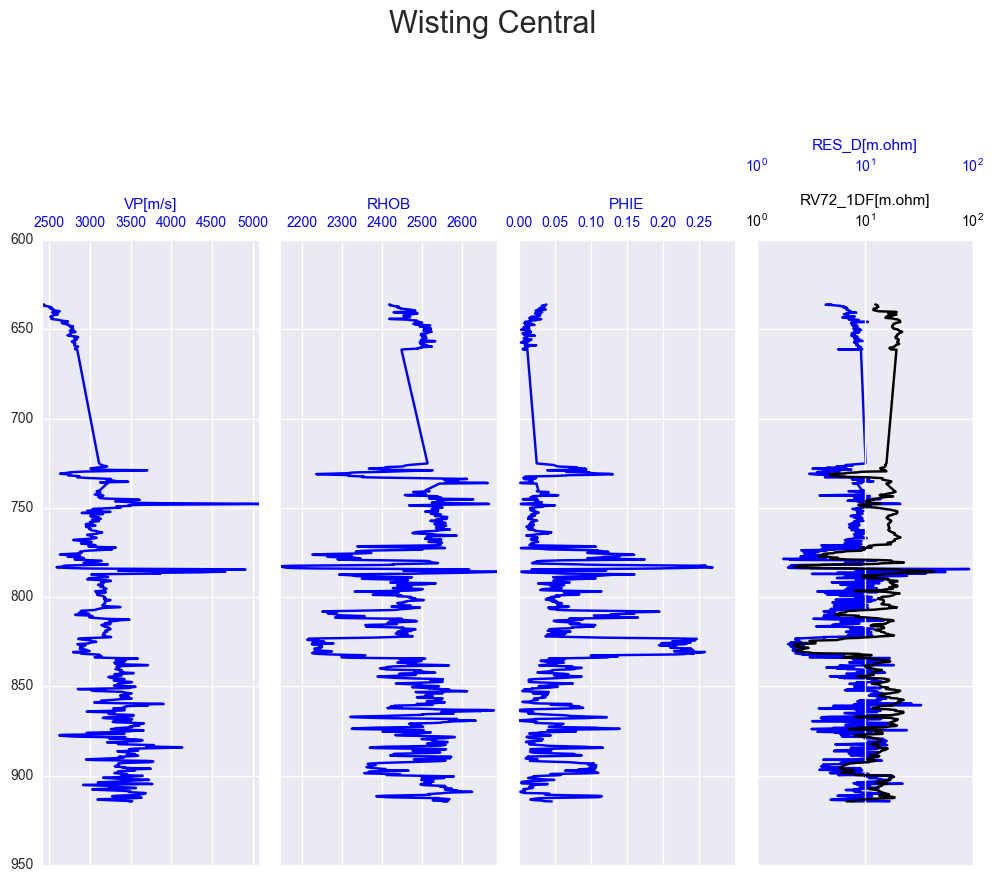

In [11]:
triple_combo_plot(df_w.index.min(),df_w.index.max())
#triple_combo_plot(700,710)
plt.show()

In [12]:
df.iloc[0:5]

PHIE    RHOB         VP         VS       GR    NPHI   VClay  \
Depth                                                                       
849.9348  0.024806  2222.6  2515.3407  1212.6843  61.5039  0.3665  0.9000   
850.0872  0.024624  2225.4  2518.3542  1206.2286  54.7915  0.3462  0.9000   
850.2396  0.034700  2245.9  2525.0238  1200.5832  53.8017  0.3499  0.8518   
850.3920  0.023794  2238.2  2525.4611  1199.6892  54.9259  0.3601  0.9000   
850.5444  0.026583  2236.9  2522.9797  1198.2126  54.4946  0.3695  0.8888   

          VCalcite   RES_D  RH72_1DF  RV72_1DF  log10_RV  log10_RESD  \
Depth                                                                  
849.9348       0.0  2.2818    2.2623    4.8029  0.681504    0.358278   
850.0872       0.0  2.2816    2.2726    4.7976  0.681024    0.358240   
850.2396       0.0  2.2825    2.2870    4.7625  0.677835    0.358411   
850.3920       0.0  2.2848    2.2989    4.6826  0.670487    0.358848   
850.5444       0.0  2.2894    2.3043    4.5867  0.661500    0.359722   

          log10_RH    log_RV  log_RESD    log_RH  
Depth                                             
849.9348  0.354550  1.569220  0.824965  0.816382  
850.0872  0.356523  1.568116  0.824877  0.820925  
850.2396  0.359266  1.560773  0.825271  0.827241  
850.3920  0.361520  1.543854  0.826278  0.832431  
850.5444  0.362539  1.523161  0.828290  0.834777

In [13]:
df_w.iloc[0:5]

PHIE    RHOB         VP        GR    NPHI         VS   VCLAY  \
DEPTH                                                                      
636.1176  0.0383  2417.5  2432.4827  158.3048  0.4107  1025.7249  0.7265   
636.2700  0.0369  2422.0  2441.6722  159.0703  0.4279  1009.1228  0.7309   
636.4224  0.0361  2421.8  2432.8399  160.1125  0.4426  1018.0056  0.7369   
636.5748  0.0359  2420.2  2423.5606  160.6738  0.4349  1009.6696  0.7401   
636.7272  0.0334  2426.6  2429.9287  162.6472  0.4373  1019.6818  0.7513   

           RES_D  Z_RH72_1DF_1_1_12  Z_RV72_1DF_1_1_12  log10_RV  log10_RESD  
DEPTH                                                                         
636.1176  4.9275             4.3217            12.4815  1.096267    0.692627  
636.2700  4.3400             4.3750            12.8037  1.107335    0.637490  
636.4224  4.8578             4.4101            13.0206  1.114631    0.686440  
636.5748  5.1846             4.4140            13.0445  1.115427    0.714715  
636.7272  5.5000             4.4140            13.0450  1.115444    0.740363

In [14]:
from sklearn import preprocessing

In [15]:
instance_count, attr_count = df.shape

In [16]:
instance_count

7208

In [17]:
attr_count

17

In [18]:
df_w.describe()

PHIE         RHOB           VP           GR         NPHI  \
count  1368.000000  1368.000000  1368.000000  1368.000000  1368.000000   
mean      0.056026  2463.212573  3171.983305   116.232334     0.265218   
std       0.054509    93.375160   324.538692    30.711536     0.063604   
min       0.000700  2147.700000  2423.560600    54.025100     0.076100   
25%       0.018700  2421.900000  2966.956750    95.891000     0.220175   
50%       0.037000  2485.050000  3166.631800   109.864450     0.251250   
75%       0.073525  2529.100000  3377.895075   134.283400     0.304725   
max       0.268900  2687.100000  5082.829300   237.650100     0.549200   

                VS        VCLAY        RES_D  Z_RH72_1DF_1_1_12  \
count  1368.000000  1368.000000  1368.000000        1368.000000   
mean   1623.500994     0.530823     8.580051           6.981306   
std     240.799931     0.206589     5.059331           2.612560   
min    1009.122800     0.030000     1.758700           1.097500   
25%    1463.906050     0.378650     6.235250           5.344175   
50%    1661.176000     0.524250     8.257050           6.992250   
75%    1779.716625     0.713425    10.077250           8.604750   
max    2623.504200     0.950000    92.289300          18.574200   

       Z_RV72_1DF_1_1_12     log10_RV   log10_RESD  
count        1368.000000  1368.000000  1368.000000  
mean           14.096319     1.107421     0.881523  
std             5.225001     0.214079     0.215207  
min             2.171100     0.336680     0.245192  
25%            11.162925     1.047778     0.794854  
50%            14.551000     1.162893     0.916825  
75%            17.740425     1.248964     1.003342  
max            43.399900     1.637489     1.965151

In [19]:
df.corr(method='pearson')

PHIE      RHOB        VP        VS        GR      NPHI  \
PHIE        1.000000 -0.798834  0.356806  0.475725 -0.801856 -0.563551   
RHOB       -0.798834  1.000000  0.139101 -0.016989  0.767739  0.252975   
VP          0.356806  0.139101  1.000000  0.970431 -0.193796 -0.797749   
VS          0.475725 -0.016989  0.970431  1.000000 -0.328605 -0.846493   
GR         -0.801856  0.767739 -0.193796 -0.328605  1.000000  0.571363   
NPHI       -0.563551  0.252975 -0.797749 -0.846493  0.571363  1.000000   
VClay      -0.850210  0.432729 -0.700221 -0.770207  0.666488  0.737274   
VCalcite   -0.059688  0.121369  0.149463  0.055272  0.011038 -0.118606   
RES_D      -0.670536  0.675351  0.027862 -0.107420  0.481163  0.173827   
RH72_1DF   -0.831377  0.693731 -0.320720 -0.420941  0.597040  0.443716   
RV72_1DF   -0.722477  0.607008 -0.360089 -0.455290  0.609401  0.546594   
log10_RV   -0.872013  0.685859 -0.386363 -0.477763  0.683294  0.560933   
log10_RESD -0.902709  0.791993 -0.162339 -0.285383  0.684539  0.368392   
log10_RH   -0.930160  0.733992 -0.367084 -0.467706  0.682270  0.513248   
log_RV     -0.872013  0.685859 -0.386363 -0.477763  0.683294  0.560933   
log_RESD   -0.902709  0.791993 -0.162339 -0.285383  0.684539  0.368392   
log_RH     -0.930160  0.733992 -0.367084 -0.467706  0.682270  0.513248   

               VClay  VCalcite     RES_D  RH72_1DF  RV72_1DF  log10_RV  \
PHIE       -0.850210 -0.059688 -0.670536 -0.831377 -0.722477 -0.872013   
RHOB        0.432729  0.121369  0.675351  0.693731  0.607008  0.685859   
VP         -0.700221  0.149463  0.027862 -0.320720 -0.360089 -0.386363   
VS         -0.770207  0.055272 -0.107420 -0.420941 -0.455290 -0.477763   
GR          0.666488  0.011038  0.481163  0.597040  0.609401  0.683294   
NPHI        0.737274 -0.118606  0.173827  0.443716  0.546594  0.560933   
VClay       1.000000  0.026501  0.433416  0.706542  0.633357  0.730043   
VCalcite    0.026501  1.000000  0.213589  0.078790  0.000704  0.007682   
RES_D       0.433416  0.213589  1.000000  0.694805  0.534148  0.617817   
RH72_1DF    0.706542  0.078790  0.694805  1.000000  0.727767  0.808473   
RV72_1DF    0.633357  0.000704  0.534148  0.727767  1.000000  0.901533   
log10_RV    0.730043  0.007682  0.617817  0.808473  0.901533  1.000000   
log10_RESD  0.656123  0.107934  0.839629  0.840261  0.672526  0.841874   
log10_RH    0.771778  0.043651  0.707544  0.933186  0.744421  0.900425   
log_RV      0.730043  0.007682  0.617817  0.808473  0.901533  1.000000   
log_RESD    0.656123  0.107934  0.839629  0.840261  0.672526  0.841874   
log_RH      0.771778  0.043651  0.707544  0.933186  0.744421  0.900425   

            log10_RESD  log10_RH    log_RV  log_RESD    log_RH  
PHIE         -0.902709 -0.930160 -0.872013 -0.902709 -0.930160  
RHOB          0.791993  0.733992  0.685859  0.791993  0.733992  
VP           -0.162339 -0.367084 -0.386363 -0.162339 -0.367084  
VS           -0.285383 -0.467706 -0.477763 -0.285383 -0.467706  
GR            0.684539  0.682270  0.683294  0.684539  0.682270  
NPHI          0.368392  0.513248  0.560933  0.368392  0.513248  
VClay         0.656123  0.771778  0.730043  0.656123  0.771778  
VCalcite      0.107934  0.043651  0.007682  0.107934  0.043651  
RES_D         0.839629  0.707544  0.617817  0.839629  0.707544  
RH72_1DF      0.840261  0.933186  0.808473  0.840261  0.933186  
RV72_1DF      0.672526  0.744421  0.901533  0.672526  0.744421  
log10_RV      0.841874  0.900425  1.000000  0.841874  0.900425  
log10_RESD    1.000000  0.932694  0.841874  1.000000  0.932694  
log10_RH      0.932694  1.000000  0.900425  0.932694  1.000000  
log_RV        0.841874  0.900425  1.000000  0.841874  0.900425  
log_RESD      1.000000  0.932694  0.841874  1.000000  0.932694  
log_RH        0.932694  1.000000  0.900425  0.932694  1.000000

In [20]:
df.corr(method='spearman')

PHIE      RHOB        VP        VS        GR      NPHI  \
PHIE        1.000000 -0.770994  0.352062  0.519775 -0.774334 -0.622066   
RHOB       -0.770994  1.000000  0.175140 -0.059777  0.752756  0.279252   
VP          0.352062  0.175140  1.000000  0.936596 -0.156285 -0.778662   
VS          0.519775 -0.059777  0.936596  1.000000 -0.379578 -0.860078   
GR         -0.774334  0.752756 -0.156285 -0.379578  1.000000  0.571394   
NPHI       -0.622066  0.279252 -0.778662 -0.860078  0.571394  1.000000   
VClay      -0.878564  0.447090 -0.639337 -0.730159  0.669634  0.748776   
VCalcite   -0.095241  0.120638  0.056065  0.023848  0.019678 -0.091017   
RES_D      -0.754282  0.807469 -0.003783 -0.173500  0.597529  0.328097   
RH72_1DF   -0.824875  0.726803 -0.254223 -0.408733  0.592386  0.508961   
RV72_1DF   -0.766552  0.642686 -0.332395 -0.480274  0.632416  0.589337   
log10_RV   -0.766552  0.642686 -0.332395 -0.480274  0.632416  0.589337   
log10_RESD -0.754282  0.807469 -0.003783 -0.173500  0.597529  0.328097   
log10_RH   -0.824875  0.726803 -0.254223 -0.408733  0.592386  0.508961   
log_RV     -0.766552  0.642686 -0.332395 -0.480274  0.632416  0.589337   
log_RESD   -0.754282  0.807469 -0.003783 -0.173500  0.597529  0.328097   
log_RH     -0.824875  0.726803 -0.254223 -0.408733  0.592386  0.508961   

               VClay  VCalcite     RES_D  RH72_1DF  RV72_1DF  log10_RV  \
PHIE       -0.878564 -0.095241 -0.754282 -0.824875 -0.766552 -0.766552   
RHOB        0.447090  0.120638  0.807469  0.726803  0.642686  0.642686   
VP         -0.639337  0.056065 -0.003783 -0.254223 -0.332395 -0.332395   
VS         -0.730159  0.023848 -0.173500 -0.408733 -0.480274 -0.480274   
GR          0.669634  0.019678  0.597529  0.592386  0.632416  0.632416   
NPHI        0.748776 -0.091017  0.328097  0.508961  0.589337  0.589337   
VClay       1.000000  0.059048  0.561323  0.709260  0.701841  0.701841   
VCalcite    0.059048  1.000000  0.116726  0.096292  0.015757  0.015757   
RES_D       0.561323  0.116726  1.000000  0.872614  0.680122  0.680122   
RH72_1DF    0.709260  0.096292  0.872614  1.000000  0.788721  0.788721   
RV72_1DF    0.701841  0.015757  0.680122  0.788721  1.000000  1.000000   
log10_RV    0.701841  0.015757  0.680122  0.788721  1.000000  1.000000   
log10_RESD  0.561323  0.116726  1.000000  0.872614  0.680122  0.680122   
log10_RH    0.709260  0.096292  0.872614  1.000000  0.788721  0.788721   
log_RV      0.701841  0.015757  0.680122  0.788721  1.000000  1.000000   
log_RESD    0.561323  0.116726  1.000000  0.872614  0.680122  0.680122   
log_RH      0.709260  0.096292  0.872614  1.000000  0.788721  0.788721   

            log10_RESD  log10_RH    log_RV  log_RESD    log_RH  
PHIE         -0.754282 -0.824875 -0.766552 -0.754282 -0.824875  
RHOB          0.807469  0.726803  0.642686  0.807469  0.726803  
VP           -0.003783 -0.254223 -0.332395 -0.003783 -0.254223  
VS           -0.173500 -0.408733 -0.480274 -0.173500 -0.408733  
GR            0.597529  0.592386  0.632416  0.597529  0.592386  
NPHI          0.328097  0.508961  0.589337  0.328097  0.508961  
VClay         0.561323  0.709260  0.701841  0.561323  0.709260  
VCalcite      0.116726  0.096292  0.015757  0.116726  0.096292  
RES_D         1.000000  0.872614  0.680122  1.000000  0.872614  
RH72_1DF      0.872614  1.000000  0.788721  0.872614  1.000000  
RV72_1DF      0.680122  0.788721  1.000000  0.680122  0.788721  
log10_RV      0.680122  0.788721  1.000000  0.680122  0.788721  
log10_RESD    1.000000  0.872614  0.680122  1.000000  0.872614  
log10_RH      0.872614  1.000000  0.788721  0.872614  1.000000  
log_RV        0.680122  0.788721  1.000000  0.680122  0.788721  
log_RESD      1.000000  0.872614  0.680122  1.000000  0.872614  
log_RH        0.872614  1.000000  0.788721  0.872614  1.000000

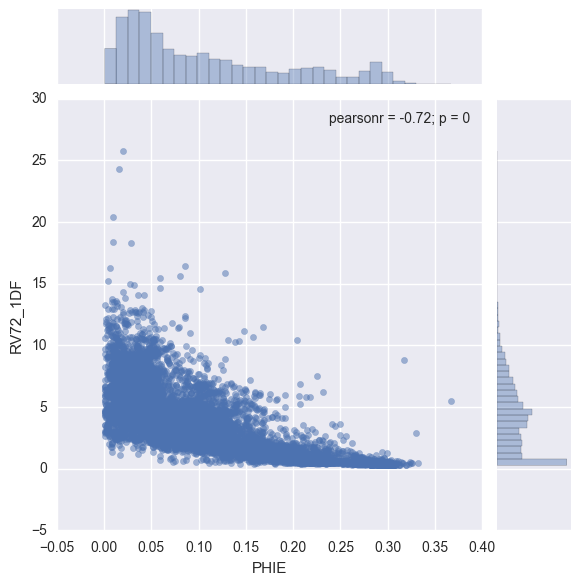

In [119]:
#plt.scatter(df['PHIE'], df['RV72_1DF'])
sns.jointplot(df['PHIE'], df['RV72_1DF'], kind='scatter', joint_kws={'alpha':0.5})

In [22]:
cm=df[cols].corr(method='pearson')
cm

PHIE      RHOB        VP        VS        GR      NPHI  \
PHIE      1.000000 -0.798834  0.356806  0.475725 -0.801856 -0.563551   
RHOB     -0.798834  1.000000  0.139101 -0.016989  0.767739  0.252975   
VP        0.356806  0.139101  1.000000  0.970431 -0.193796 -0.797749   
VS        0.475725 -0.016989  0.970431  1.000000 -0.328605 -0.846493   
GR       -0.801856  0.767739 -0.193796 -0.328605  1.000000  0.571363   
NPHI     -0.563551  0.252975 -0.797749 -0.846493  0.571363  1.000000   
VClay    -0.850210  0.432729 -0.700221 -0.770207  0.666488  0.737274   
VCalcite -0.059688  0.121369  0.149463  0.055272  0.011038 -0.118606   
RES_D    -0.670536  0.675351  0.027862 -0.107420  0.481163  0.173827   
RV72_1DF -0.722477  0.607008 -0.360089 -0.455290  0.609401  0.546594   

             VClay  VCalcite     RES_D  RV72_1DF  
PHIE     -0.850210 -0.059688 -0.670536 -0.722477  
RHOB      0.432729  0.121369  0.675351  0.607008  
VP       -0.700221  0.149463  0.027862 -0.360089  
VS       -0.770207  0.055272 -0.107420 -0.455290  
GR        0.666488  0.011038  0.481163  0.609401  
NPHI      0.737274 -0.118606  0.173827  0.546594  
VClay     1.000000  0.026501  0.433416  0.633357  
VCalcite  0.026501  1.000000  0.213589  0.000704  
RES_D     0.433416  0.213589  1.000000  0.534148  
RV72_1DF  0.633357  0.000704  0.534148  1.000000

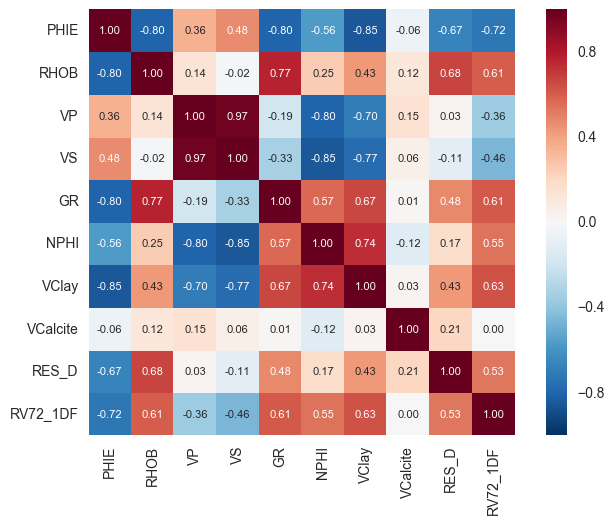

In [23]:
ax = sns.heatmap(cm,annot=True,square=True,fmt='.2f',annot_kws={'size': 8}) # compute and plot the pair-wise correlations

In [24]:
cm_log10res=df[cols_log10res].corr(method='pearson')
cm_log10res

PHIE      RHOB        VP        VS        GR      NPHI  \
PHIE        1.000000 -0.798834  0.356806  0.475725 -0.801856 -0.563551   
RHOB       -0.798834  1.000000  0.139101 -0.016989  0.767739  0.252975   
VP          0.356806  0.139101  1.000000  0.970431 -0.193796 -0.797749   
VS          0.475725 -0.016989  0.970431  1.000000 -0.328605 -0.846493   
GR         -0.801856  0.767739 -0.193796 -0.328605  1.000000  0.571363   
NPHI       -0.563551  0.252975 -0.797749 -0.846493  0.571363  1.000000   
VClay      -0.850210  0.432729 -0.700221 -0.770207  0.666488  0.737274   
VCalcite   -0.059688  0.121369  0.149463  0.055272  0.011038 -0.118606   
log10_RESD -0.902709  0.791993 -0.162339 -0.285383  0.684539  0.368392   
log10_RV   -0.872013  0.685859 -0.386363 -0.477763  0.683294  0.560933   

               VClay  VCalcite  log10_RESD  log10_RV  
PHIE       -0.850210 -0.059688   -0.902709 -0.872013  
RHOB        0.432729  0.121369    0.791993  0.685859  
VP         -0.700221  0.149463   -0.162339 -0.386363  
VS         -0.770207  0.055272   -0.285383 -0.477763  
GR          0.666488  0.011038    0.684539  0.683294  
NPHI        0.737274 -0.118606    0.368392  0.560933  
VClay       1.000000  0.026501    0.656123  0.730043  
VCalcite    0.026501  1.000000    0.107934  0.007682  
log10_RESD  0.656123  0.107934    1.000000  0.841874  
log10_RV    0.730043  0.007682    0.841874  1.000000

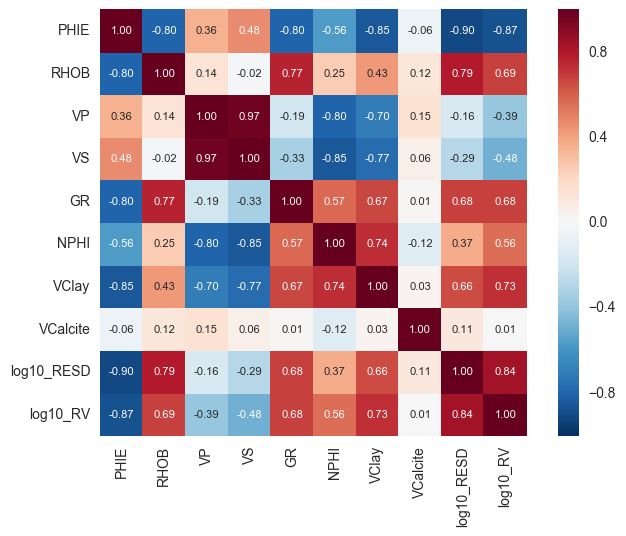

In [25]:
ax = sns.heatmap(cm_log10res,annot=True,square=True,fmt='.2f',annot_kws={'size': 8}) # compute and plot the pair-wise correlations

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [34]:
df_w.rename(columns={'VCLAY': 'VClay'}, inplace=True)

df_combined = pd.concat([df, df_w])

#X = df_combined[['PHIE','RHOB','VP','log10_RESD']]
#X = df.PHIE
#y = df_combined.log10_RV

X = df[['PHIE','RHOB','VP','log10_RESD']]
#X = df.PHIE
y = df.log10_RV

X_w = df_w[['PHIE','RHOB','VP','log10_RESD']]
#X = df.PHIE
y_w = df_w.log10_RV

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [86]:
#needed for prediction based on a single feature: 
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

In [87]:
y_train.shape

(2162,)

In [88]:
X_train.shape

(2162, 4)

In [89]:
lr = LinearRegression().fit(X_train, y_train)
#lasso = Lasso(alpha=1.0).fit(X_train, y_train)

In [90]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -1.04779899e+00   7.69071403e-04  -2.35272624e-04   6.45334693e-01]
lr.intercept_: -0.6589622118956102


In [91]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
#print("Skrugard score: {:.2f}".format(lr.score(X_s, y_s)))
print("Wisting score: {:.2f}".format(lr.score(X_w, y_w)))

Training set score: 0.80
Test set score: 0.80
Wisting score: 0.37


In [92]:
# Calculate RSS
((y_test - lr.predict(X_test)) **2).sum()

170.19184073172624

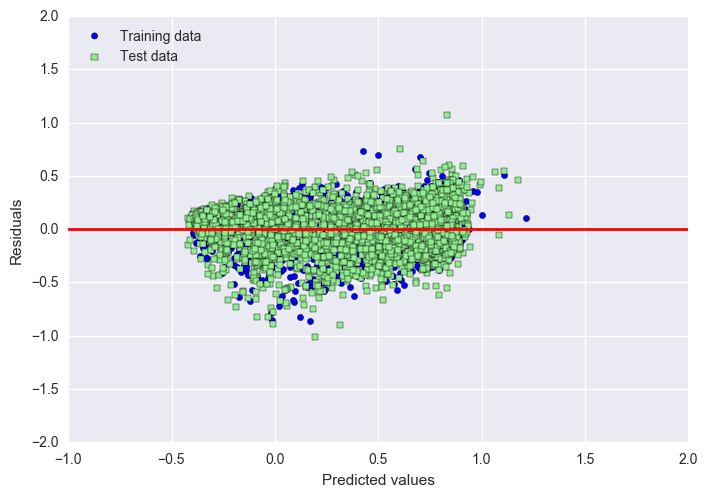

In [93]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-1, 2])
plt.ylim([-2, 2])
#plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [94]:
y_pred = lr.predict(X)
df['pred_RV'] = 10**y_pred
df['pred_aniso'] = df.pred_RV / df.RES_D
df['Aniso_RV72RESD'] = df.RV72_1DF / df.RES_D
df['aniso_diff'] = df.pred_aniso - df.Aniso_RV72RESD

y_w_pred = lr.predict(X_w)
df_w['pred_RV'] = 10**y_w_pred
df_w['pred_aniso'] = df_w.pred_RV / df_w.RES_D
df_w['Aniso_RV72RESD'] = df_w.Z_RV72_1DF_1_1_12 / df_w.RES_D
df_w['aniso_diff'] = df_w.pred_aniso - df_w.Aniso_RV72RESD

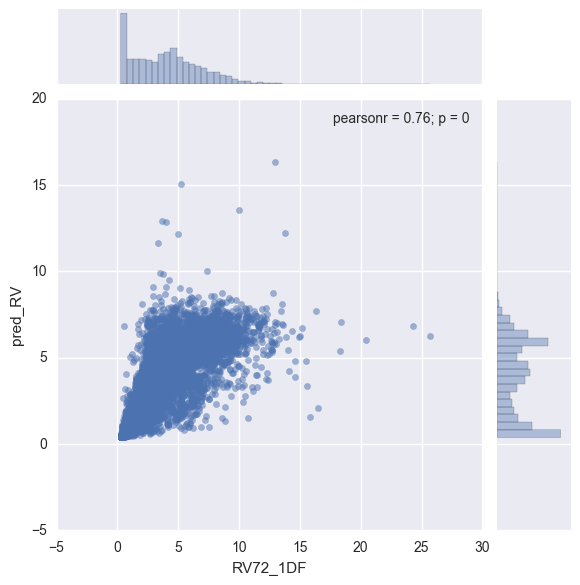

In [95]:
#lin_regplot(X_train, y_train, lr)
#sns.jointplot(df_w['Z_RV72_1DF_1_1_12'], df_w['pred_RV'], kind='scatter', joint_kws={'alpha':0.5})
sns.jointplot(df['RV72_1DF'], df['pred_RV'], kind='scatter', joint_kws={'alpha':0.5})

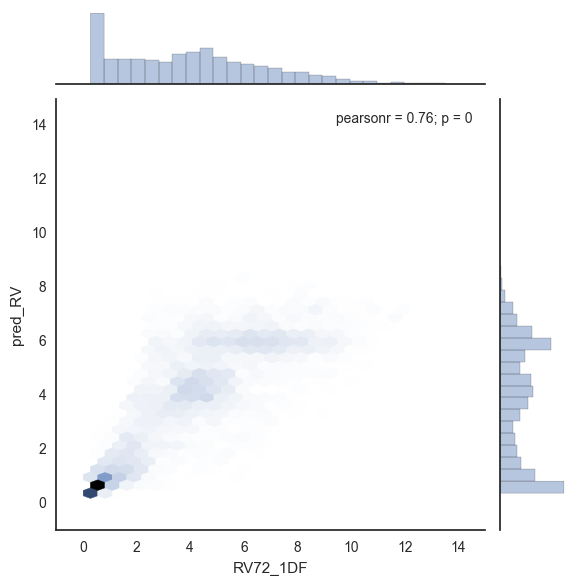

In [106]:
with sns.axes_style("white"):
    g=sns.jointplot(x=df['RV72_1DF'], y=df['pred_RV'], kind="hex", xlim=(-1, 15), ylim=(-1, 15));
  #  rsquare = lr.score(X_test, y_test)
  #  g = g.annotate(rsquare, template="{stat}: {val:.2f}", stat="$R^2$", loc="upper left", fontsize=12)

In [97]:
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.index >= top_depth) & (df.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Skrugard", fontsize=22)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
#2nd track: Resistivities

    ax01=ax[0].twiny()
    ax01.set_xlim(.1,100)
    ax01.set_xscale('log')
    ax01.grid(True)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel('RES_D[m.ohm]', color='black')
    ax01.plot(logs.RES_D, logs.index, label='RES_D[m.ohm]', color='black')
    ax01.tick_params(axis='x', colors='black')    

    ax02=ax[1].twiny()
    ax02.set_xlim(.1,100)
    ax02.set_xscale('log')
    ax02.plot(logs.RV72_1DF, logs.index, label='RV72_1DF[m.ohm]', color='black') 
    ax02.spines['top'].set_position(('outward',0))
    ax02.set_xlabel('RV72_1DF[m.ohm]', color='black')    
    ax02.tick_params(axis='x', colors='black')

    ax03=ax[1].twiny()
    ax03.set_xlim(.1,100)
    ax03.set_xscale('log')
    ax03.grid(True)
    ax03.spines['top'].set_position(('outward',40))
    ax03.set_xlabel('pred_RV[m.ohm]', color='red')
    ax03.plot(logs.pred_RV, logs.index, label='pred_RV[m.ohm]', color='red')
    ax03.tick_params(axis='x', colors='red') 
    
#2nd track: anisotropy track
    
    ax11=ax[2].twiny()
    ax11.set_xlim(0,10)
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel("meas_aniso")
    ax11.plot(logs.Aniso_RV72RESD, logs.index, label='meas_aniso', color='black')
    ax11.set_xlabel('meas_aniso',color='black')    
    ax11.tick_params(axis='x', colors='black')
    ax11.grid(True) 
    
    ax12=ax[2].twiny()
    ax12.set_xlim(0,10)
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel("pred_aniso")
    ax12.plot(logs.pred_aniso, logs.index, label='pred_aniso', color='red')
    ax12.set_xlabel('pred_aniso',color='red')    
    ax12.tick_params(axis='x', colors='red')
    ax12.grid(True)  
    
#3rd track: aniso_diff track
    
    ax21=ax[3].twiny()
    ax21.set_xlim(-10,10)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel("aniso_diff")
    ax21.plot(logs.aniso_diff, logs.index, label='aniso_diff', color='blue')
    ax21.set_xlabel('aniso_diff',color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    ax21.grid(True)

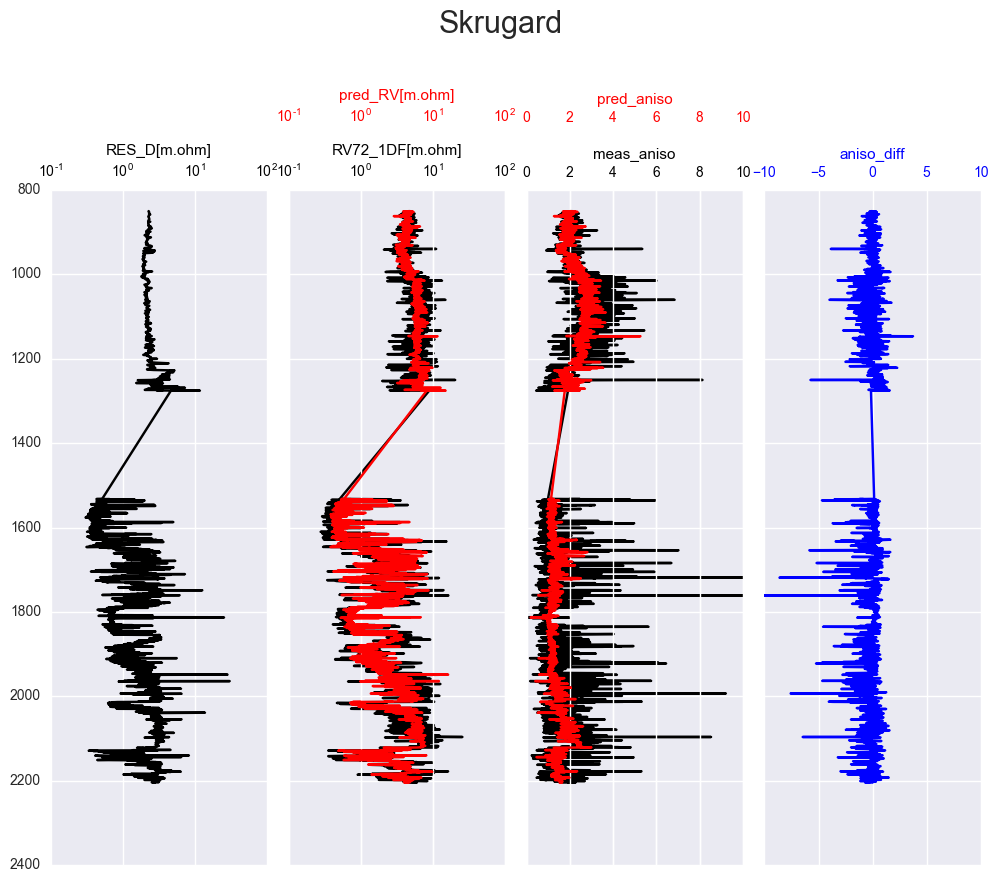

In [98]:
triple_combo_plot(df.index.min(),df.index.max())
#triple_combo_plot(900,1600)
plt.show()

In [99]:
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df_w[(df_w.index >= top_depth) & (df_w.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Wisting Central", fontsize=22)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
#2nd track: Resistivities

    ax01=ax[0].twiny()
    ax01.set_xlim(.1,100)
    ax01.set_xscale('log')
    ax01.grid(True)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel('RES_D[m.ohm]', color='black')
    ax01.plot(logs.RES_D, logs.index, label='RES_D[m.ohm]', color='black')
    ax01.tick_params(axis='x', colors='black')    

    ax02=ax[1].twiny()
    ax02.set_xlim(.1,100)
    ax02.set_xscale('log')
    ax02.plot(logs.Z_RV72_1DF_1_1_12, logs.index, label='RV72_1DF[m.ohm]', color='black') 
    ax02.spines['top'].set_position(('outward',0))
    ax02.set_xlabel('RV72_1DF[m.ohm]', color='black')    
    ax02.tick_params(axis='x', colors='black')

    ax03=ax[1].twiny()
    ax03.set_xlim(.1,100)
    ax03.set_xscale('log')
    ax03.grid(True)
    ax03.spines['top'].set_position(('outward',40))
    ax03.set_xlabel('pred_RV[m.ohm]', color='red')
    ax03.plot(logs.pred_RV, logs.index, label='pred_RV[m.ohm]', color='red')
    ax03.tick_params(axis='x', colors='red') 
    
#2nd track: anisotropy track
    
    ax11=ax[2].twiny()
    ax11.set_xlim(0,10)
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel("meas_aniso")
    ax11.plot(logs.Aniso_RV72RESD, logs.index, label='meas_aniso', color='black')
    ax11.set_xlabel('meas_aniso',color='black')    
    ax11.tick_params(axis='x', colors='black')
    ax11.grid(True) 
    
    ax12=ax[2].twiny()
    ax12.set_xlim(0,10)
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel("pred_aniso")
    ax12.plot(logs.pred_aniso, logs.index, label='pred_aniso', color='red')
    ax12.set_xlabel('pred_aniso',color='red')    
    ax12.tick_params(axis='x', colors='red')
    ax12.grid(True)  
    
#3rd track: aniso_diff track
    
    ax21=ax[3].twiny()
    ax21.set_xlim(-10,10)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel("aniso_diff")
    ax21.plot(logs.aniso_diff, logs.index, label='aniso_diff', color='blue')
    ax21.set_xlabel('aniso_diff',color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    ax21.grid(True)

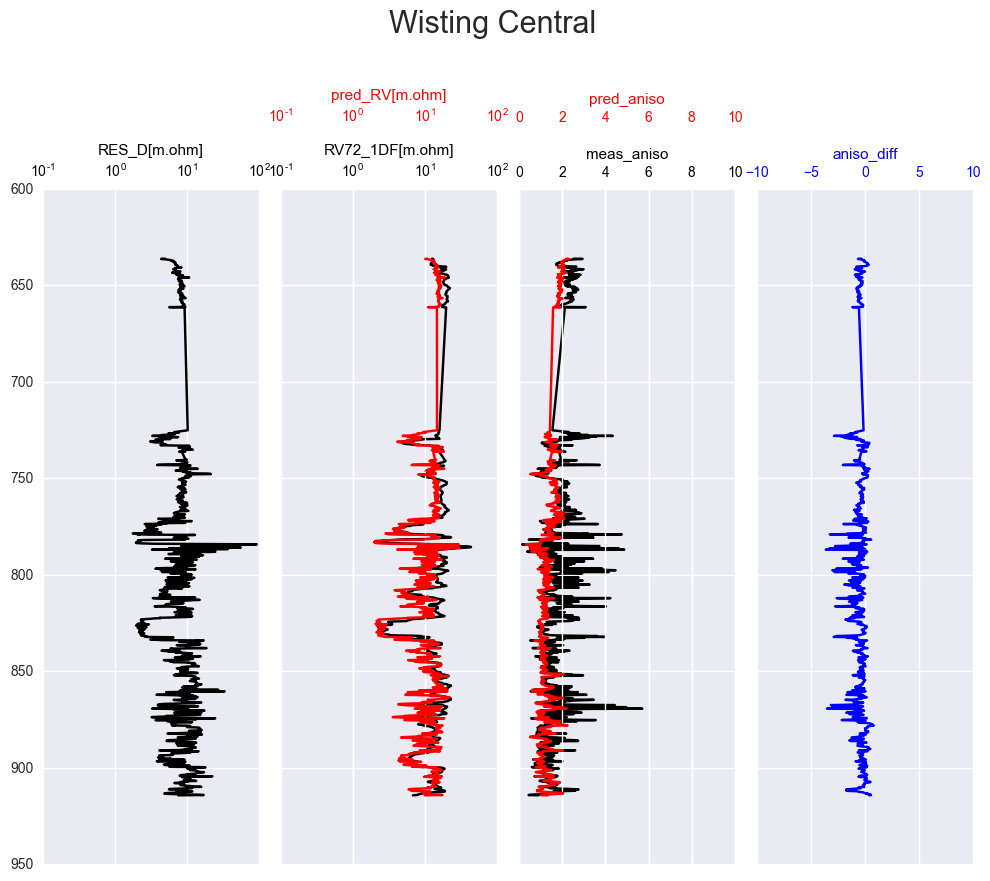

In [100]:
triple_combo_plot(df_w.index.min(),df_w.index.max())
#triple_combo_plot(900,1600)
plt.show()